<center>
<img src="logo.png" height="900"> 
</center>


#  Простые симуляции

В этом задании мы решим несколько простых задачек на симуляции. 

In [1]:
import numpy as np
import scipy.stats as sts
import matplotlib.pyplot as plt

## Упражнение 1 (распределение Пуассона)

Случайная величина $X$ имеет распределение Пуассона с $\lambda = 2$,  $X \sim Pois(2)$. С помощью $10^6$ симуляций оцените: 

* $P(X > 6)$
* $P(X > 6 \mid X > 5)$
* $P(X > 5, X < 7)$
* $E(X^3)$ 
* $E(X \mid X > 5)$

__Под чёрточками имеется в виду условная вероятность!!!__

Вбейте получившиеся ответы в переменные `ans1`, `ans2`, $\ldots$, `ans5`. 

In [3]:
X = sts.poisson.rvs(2, size=10**6)
ans1 = np.mean(X > 6)
print(ans1)
ans2 = np.mean(X > 6)/np.mean(X > 5)
print(ans2)
ans3 = np.mean((X > 5) & (X > 7))
print(ans3)
ans4 = np.mean(X**3)
print(ans4)
ans5 = np.mean(X[X > 5])
print(ans5)

0.004613
0.2757322175732218
0.00112
22.113063
6.361446503287508


In [5]:
assert np.abs(ans3 - 0.01) < 1e-2

## Упражнение 2 (нейросети)

Юра завёл себе две нейронные сетки и два сервера для их обучения. Две нейросети обучаются независимо на двух серверах. Время их обучения $T_1$ и $T_2$ равномерно распределено на отрезке $[1;3]$ (обучение измеряется в часах). В процессе обучения сервер может упасть. Момент падения сервера $T$ распределён экспоненциально с параметром $\lambda = 0.3$. Он не зависит от времени обучения нейросеток. 

Известно, что одна из нейросетей успела обучиться, а вторая не успела. Какова вероятность того, что $T \le 1.5$? Ответ вбейте в переменную `ans6`. При симуляциях для генерации момента падения используйте для обоих серверов одну и ту же случайную величину. 

**Hint:** при решении задачи помните о том, что у вас две нейросетки!

In [6]:
T1 = sts.uniform.rvs(1, 2, size = 10**6)
T2 = sts.uniform.rvs(1, 2, size = 10**6)
fail = sts.expon.rvs(scale = 1 / 0.3, size = 10**6)
ans6 = np.mean(fail[(T1 > fail) != (T2 > fail)] <= 1.5)

In [7]:
# проверка, что задание решено корректно
assert ans6 < 0.2
assert ans6 > 0.1

# Похожие тесты скрыты от вас

## Упражнение 3 (квантильное преобразование)

Случайная величина $X$ описывается функцией распределения: 

$$
F(x) = \left( \frac{\ln x}{\ln \theta} \right)^{\alpha},  \quad x \in [1; \theta]
$$

Сгенерируйте из такого распределения выборку объёма $10^6$ и оцените математическое ожидание данной случайной величины. Запишите его в переменную `ans7`. В качестве параметров возьмите $\alpha=2, \theta = 10$.

In [9]:
theta = 10
alpha = 2
X = theta**(np.random.uniform(size = 10**6)**(1 / alpha))
ans7 = np.mean(X)

Нарисуйте для получившегося распределения гистограмму. Найдите в аналитическом виде плотность распределения. Нанесите её на картинку с гистограммой. 

(array([0.02890447, 0.07029975, 0.09582036, 0.11370645, 0.12344685,
        0.1313314 , 0.13425963, 0.13672668, 0.14114958, 0.13877144,
        0.13863253, 0.13826025, 0.13603768, 0.13762126, 0.13522644,
        0.13252047, 0.12970337, 0.12896437, 0.12814202, 0.12471927,
        0.12508599, 0.12204107, 0.12056307, 0.11810158, 0.11720144,
        0.11589012, 0.11418431, 0.11346753, 0.11208954, 0.10917798,
        0.10888904, 0.10848342, 0.10583302, 0.1042161 , 0.10437168,
        0.1021769 , 0.1013601 , 0.0983263 , 0.09941536, 0.09678162,
        0.09687608, 0.09437569, 0.09388673, 0.09251985, 0.09232537,
        0.09145857, 0.09026394, 0.08858591, 0.08757464, 0.08664672]),
 array([1.00138169, 1.18135388, 1.36132608, 1.54129827, 1.72127047,
        1.90124266, 2.08121485, 2.26118705, 2.44115924, 2.62113144,
        2.80110363, 2.98107583, 3.16104802, 3.34102021, 3.52099241,
        3.7009646 , 3.8809368 , 4.06090899, 4.24088119, 4.42085338,
        4.60082557, 4.78079777, 4.96076996, 5.

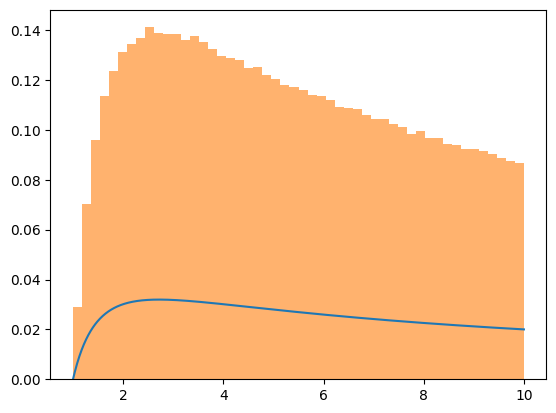

In [11]:
trans_pdf = (2 / 10) * (np.log(np.linspace(1, 10, 1000)) / np.log(10)) ** (2 - 1) / np.linspace(1, 10, 1000)
plt.plot(np.linspace(1, 10, 1000), trans_pdf)
plt.hist(X, bins = 50, density = True, alpha = 0.6)

In [12]:
# проверка, что задание решено корректно
assert ans7 < 6
assert ans7 > 2

# Похожие тесты скрыты от вас

## Упражнение 4 (сходимость по вероятности)

__Это задание никак не оценивается.__ У распределения хи-квадрат есть следующее свойство: если $X_1, \ldots, X_n \sim iid~N(0,1)$, тогда имеет место следующая сходимость по вероятности:

$$
\frac{\chi^2_n}{n} = \frac{X_1^2 + \ldots + X_n^2}{n} \to  1
$$

Продемонстрируйте с помощью симуляций, что это именно так. От вас требуется построить ту же картинку, что мы строили при иллюстрации ЗБЧ в лекции. Не забудьте построить для нескольких разных $\varepsilon$ коридоры и убедиться, что последовательность с некоторого момента начинает пробивать их довольно редко.

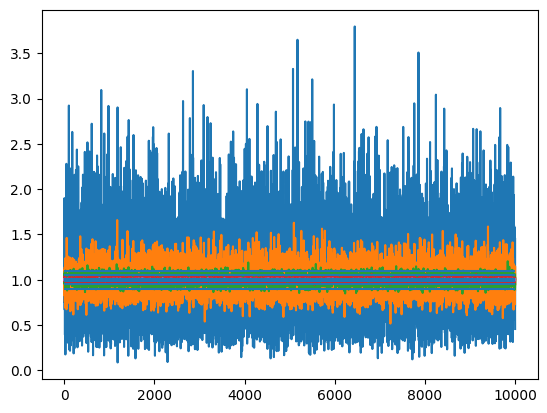

In [15]:
vals = [10, 100, 1000, 10**4, 10**5]
eps = [0.1, 0.05, 0.01]
for val in vals:
    dif = []
    for i in range(10**4):
        X = np.random.normal(size = val)
        dif.append(np.sum(X**2) / val)
    plt.plot(range(10**4), dif, label = f'n = {val}')
for ep in eps:
    plt.hlines(1 + ep, 0, 10**4, label = f'{eps}+')
    plt.hlines(1 - ep, 0, 10**4, label = f'{eps}-')
